In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
import seaborn as sns

In [4]:
# error handling
try: 
    # connect to the database
    conn = sqlite3.connect("skyrim.db")
    cursor = conn.cursor()
except sqlite3.Error as e:
    # if problem
    print("Error connecting to the database", e)

In [4]:
# looking at total sql database
cursor.execute("""
                SELECT name
                FROM sqlite_master
                WHERE type='table'
                ORDER BY 1
                """)
cursor.fetchall()

[('books',), ('characters',), ('ingredients',), ('races',), ('weapons',)]

In [49]:
char_query = """
SELECT *
FROM characters c
;
"""

df = pd.read_sql(char_query, conn)


# include all of the columns
pd.set_option('display.max_columns', None)
# display the first few rows of the data
df.head()


,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,0,https://en.uesp.net/wiki/Skyrim:Beitild,Beitild,Dawnstar,Beitild's House,Nord,Female,6,Miner,0001A6B6,00013612,91,67,67,"Smithing, Two-handed",No Crime,Unaggressive,CrimeFactionPale; DawnstarIronBreakerMinersFac...,None,No,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,6.0,91.0,67.0,67.0
1,1,https://en.uesp.net/wiki/Skyrim:Brina_Merilis,Brina Merilis,Dawnstar,Brina's House,Nord,Female,PC×1 (range=10-25),Warrior,0001A6B8,0001A6B7,50+(PC-1)×11.7,50,50+(PC-1)×3.3,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,CrimeFactionPale; DawnstarBrinaHouseFaction; F...,CombatWarrior1H,Yes,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,155.3,50.0,79.7
2,2,https://en.uesp.net/wiki/Skyrim:Horik_Halfhand,Horik Halfhand,Dawnstar,Brina's House,Nord,Male,PC×1 (range=10-25),Warrior,0001A6BA,0001A6B9,50+(PC-1)×11.7,50,50+(PC-1)×3.3,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,CrimeFactionPale; DawnstarBrinaHouseFaction; I...,CombatWarrior1H,Yes,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,155.3,50.0,79.7
3,3,https://en.uesp.net/wiki/Skyrim:Dawnstar_Guard,Dawnstar Guard,None,None,Nord,Male,PCx1 (Range=20-50),Warrior,None,0002D794,None,None,None,None,Indeterminate,Indeterminate,CrimeFactionPale; Stormcloaks; Sons of Skyrim;...,None,No,Dawnstar,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,20.0,NaN,NaN,NaN
4,4,https://en.uesp.net/wiki/Skyrim:Babette,Babette,None,None,Breton,Female,10,Assassin,0001D4BC,0001D4B7,125,15,95,"Archery, One-handed, Sneak, Conjuration, Light...",No Crime,Unaggressive,Alchemy Trainer; Babette's Bed Ownership; Babe...,TrainerAlchemyMaster,Yes,"Dark Brotherhood Sanctuary, Dawnstar Sanctuary",Alchemy (Master),1.0,500 (+1000 Master Trader),See Standard Merchandise,"Animal Parts, Food, Ingredients, Poisons, Poti...","Vampire, Undead, Child",No,No,None,No,No,None,No,No,None,Vanilla,10.0,125.0,15.0,95.0


In [51]:
# basic pandas functions to get an overview of dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1009 non-null   int64  
 1   Source           1009 non-null   object 
 2   Name             1009 non-null   object 
 3   Home City        665 non-null    object 
 4   House            257 non-null    object 
 5   Race             1009 non-null   object 
 6   Gender           1009 non-null   object 
 7   Level            1009 non-null   object 
 8   Class            1009 non-null   object 
 9   RefID            975 non-null    object 
 10  BaseID           1003 non-null   object 
 11  Health           994 non-null    object 
 12  Magicka          992 non-null    object 
 13  Stamina          978 non-null    object 
 14  Primary Skills   877 non-null    object 
 15  Morality         1009 non-null   object 
 16  Aggression       1009 non-null   object 
 17  Faction(s)    

,index,Merchant,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
count,1009.000000,163.0,1009.000000,994.000000,992.000000,978.000000
mean,504.000000,1.0,8.486125,138.280355,71.102092,81.599782
std,291.417513,0.0,9.350765,144.704267,59.497145,62.055653
min,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
25%,252.000000,1.0,4.000000,75.000000,50.000000,60.000000
50%,504.000000,1.0,6.000000,91.000000,60.000000,67.000000
75%,756.000000,1.0,10.000000,149.525000,67.000000,82.697500
max,1008.000000,1.0,150.000000,2071.000000,626.360000,1043.000000


In [54]:
# check for null values by column
df.isna().sum()

# we could remove or impute duplicates if necessary
# df.dropna()
# df.fillna(value, inplace=True)

index                 0
Source                0
Name                  0
Home City           344
House               752
Race                  0
Gender                0
Level                 0
Class                 0
RefID                34
BaseID                6
Health               15
Magicka              17
Stamina              31
Primary Skills      132
Morality              0
Aggression            0
Faction(s)           40
Class Details       633
Essential             0
Location            374
Training            950
Merchant            846
Gold                862
Sells               851
Buys                864
Race Details        946
Follower              0
Respawns              1
Store               893
AdoptHF               0
Protected             0
Perks               906
Marry                 0
StewardHF             0
Horses             1003
Added by              0
Level (PC=10)         0
Health (PC=10)       15
Magicka (PC=10)      17
Stamina (PC=10)      31
dtype: int64

In [60]:
# check for duplicates
df.duplicated(keep = False, subset=['Home City'])

# we could drop duplicates if necessary
# df.drop_duplicates()

0       True
1       True
2       True
3       True
4       True
        ... 
1004    True
1005    True
1006    True
1007    True
1008    True
Length: 1009, dtype: bool

In [68]:
query = """
SELECT *
FROM characters c
;
"""

df = pd.read_sql(query, conn)
df.groupby(['Race','Gender'])['Name'].count()
df.groupby(['Race','Gender'])['Name'].nunique()

Race      Gender       
Animals   Indeterminate     10
Argonian  Female             5
          Male              14
Breton    Female            30
          Male              59
Dark Elf  Female            31
          Male              63
Dremora   Male               1
Elder     Female            15
          Male              32
High Elf  Female            12
          Male              28
Imperial  Female            32
          Male              58
Khajiit   Female             9
          Male              16
Nord      Female           140
          Male             304
          Radiant            4
Orc       Female            23
          Male              33
Radiant   Male               2
          Radiant            3
Redguard  Female            21
          Male              23
Snow Elf  Male               7
Undead    Indeterminate      3
Wood Elf  Female             8
          Male              15
Name: Name, dtype: int64

In [70]:
# what 6 rows don't have BaseIDs?
query = """
SELECT *
FROM characters
WHERE BaseID IS NULL
;
"""

df = pd.read_sql(query, conn)
df.head(6)


,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,148,https://en.uesp.net/wiki/Skyrim:Thalmor_Soldier,Thalmor,None,None,High Elf,Male,Leveled (4-36),(?),None,None,127-565,56-120,62-190,None,No Crime,Aggressive,Thalmor,None,No,"Northshore Landing, Abandoned Lodge",None,NaN,None,None,None,None,No,Yes,None,No,No,None,No,No,None,Vanilla,20.0,346.0,88.0,126.0
1,183,https://en.uesp.net/wiki/Skyrim:Redoran_Guard,Redoran Guard,Raven Rock,None,Dark Elf,Male,PC×1 (range=20-50),Soldier,None,None,None,50,None,None,No Crime,Aggressive,DLC2CrimeRavenRockFaction; Raven Rock Guard Fa...,None,No,None,None,NaN,None,None,None,None,No,Yes,None,No,Yes,Extra Damage,No,No,None,Vanilla,20.0,NaN,50.0,NaN
2,432,https://en.uesp.net/wiki/Skyrim:Whiterun_Guard,Whiterun Guard,Whiterun,None,Nord,Male,PCx1 (Range=20-50),Guard,None,None,None,None,None,None,Indeterminate,Indeterminate,CrimeFactionWhiterun; Guard Faction; Whiterun ...,None,No,"Riverwood, Rorikstead,, Whiterun, Whiterun Hold",None,NaN,None,None,None,None,No,Yes,None,No,No,None,No,No,None,Vanilla,20.0,NaN,NaN,NaN
3,882,https://en.uesp.net/wiki/Skyrim:Thalmor#Dragon...,Thalmor,None,None,High Elf,Male,Leveled (4-36),(?),None,None,127-565,56-120,62-190,None,No Crime,Aggressive,Thalmor,None,No,"Northshore Landing, Abandoned Lodge",None,NaN,None,None,None,None,No,Yes,None,No,No,None,No,No,None,Vanilla,20.0,346.0,88.0,126.0
4,945,https://en.uesp.net/wiki/Skyrim:Hunter,Hunter,None,None,Radiant,Radiant,5-15,Bandit,None,None,35+(PC-2)×5.5,25,25+(PC-2)×2,"One-handed, Two-handed, Block, Light Armor",No Crime,Aggressive,"HunterFaction, JobMerchantFaction, WEServicesH...",None,No,"Hunter Camps, Random Encounters",None,1.0,None,"Food, Ingredients","Food, Ingredients",None,No,Yes,None,No,No,None,No,No,None,Vanilla,10.0,79.0,25.0,41.0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Race     553 non-null    object
 1   Level    553 non-null    int64 
 2   Health   553 non-null    int64 
 3   Magicka  553 non-null    int64 
 4   Stamina  553 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.7+ KB


In [79]:
# non-descript guard npcs have no baseIDs, so we can drop them from the data
# pull the characters data from the table
query = """
SELECT *
FROM characters c
;
"""

# create a unique df to use from now on without guards containing only npcs with BaseIDs
base_df = pd.read_sql(query, conn)

# drop the rows containing guards where BaseIds is duplicated because it is ['None'] not null
base_df.drop_duplicates(subset=['BaseID'], keep=False, inplace=False)

# we could simply do most cleaning like this in SQLite however

,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,0,https://en.uesp.net/wiki/Skyrim:Beitild,Beitild,Dawnstar,Beitild's House,Nord,Female,6,Miner,0001A6B6,00013612,91,67,67,"Smithing, Two-handed",No Crime,Unaggressive,CrimeFactionPale; DawnstarIronBreakerMinersFac...,None,No,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,6.0,91.0,67.0,67.0
1,1,https://en.uesp.net/wiki/Skyrim:Brina_Merilis,Brina Merilis,Dawnstar,Brina's House,Nord,Female,PC×1 (range=10-25),Warrior,0001A6B8,0001A6B7,50+(PC-1)×11.7,50,50+(PC-1)×3.3,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,CrimeFactionPale; DawnstarBrinaHouseFaction; F...,CombatWarrior1H,Yes,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,155.3,50.0,79.7
2,2,https://en.uesp.net/wiki/Skyrim:Horik_Halfhand,Horik Halfhand,Dawnstar,Brina's House,Nord,Male,PC×1 (range=10-25),Warrior,0001A6BA,0001A6B9,50+(PC-1)×11.7,50,50+(PC-1)×3.3,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,CrimeFactionPale; DawnstarBrinaHouseFaction; I...,CombatWarrior1H,Yes,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,155.3,50.0,79.7
3,3,https://en.uesp.net/wiki/Skyrim:Dawnstar_Guard,Dawnstar Guard,None,None,Nord,Male,PCx1 (Range=20-50),Warrior,None,0002D794,None,None,None,None,Indeterminate,Indeterminate,CrimeFactionPale; Stormcloaks; Sons of Skyrim;...,None,No,Dawnstar,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,20.0,NaN,NaN,NaN
4,4,https://en.uesp.net/wiki/Skyrim:Babette,Babette,None,None,Breton,Female,10,Assassin,0001D4BC,0001D4B7,125,15,95,"Archery, One-handed, Sneak, Conjuration, Light...",No Crime,Unaggressive,Alchemy Trainer; Babette's Bed Ownership; Babe...,TrainerAlchemyMaster,Yes,"Dark Brotherhood Sanctuary, Dawnstar Sanctuary",Alchemy (Master),1.0,500 (+1000 Master Trader),See Standard Merchandise,"Animal Parts, Food, Ingredients, Poisons, Poti...","Vampire, Undead, Child",No,No,None,No,No,None,No,No,None,Vanilla,10.0,125.0,15.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1004,https://en.uesp.net/wiki/Skyrim:Vighar,Vighar,None,None,Elder,Male,Radiant (14-53),Vampire,0005B824,0005B830,252-968,177-458,126-354,"Sneak, Conjuration, Light Armor, One-handed",No Crime,Aggressive,VampireFaction,None,No,Bloodlet Throne,None,NaN,None,None,None,"Vampire, Undead",No,Yes,None,No,No,None,No,No,None,Vanilla,33.5,610.0,317.5,240.0
1005,1005,https://en.uesp.net/wiki/Skyrim:Vigilant_Adalvald,Vigilant Adalvald,None,None,Nord,Male,9,Vigilant,xx00FBB8,xx00FB33,130,63,77,"Block, Light Armor, Alteration, Heavy Armor, O...",No Crime,Unaggressive,Vigilant of Stendarr Faction,Vigilant1hMeleeClass,No,Dimhollow Crypt,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Dawnguard,9.0,130.0,63.0,77.0
1006,1006,https://en.uesp.net/wiki/Skyrim:Volk,Volk,None,None,Nord,Male,Radiant (5-25),Vigilant,xx013D14,xx019580,90-290,57-90,63-130,"Block, Light Armor, One-handed, Alteration, He...",Any Crime,Very Aggressive,DLC1RuunvaldFaction,Vigilant1hMeleeClass,No,Ruunvald Excavation,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Dawnguard,15.0,190.0,73.5,96.5
1007,1007,https://en.uesp.net/wiki/Skyrim:Wizard,Wizard,None,None,Wood Elf,Male,Leveled (1-25),Bandit Wizard,None,xx020FC1,35-441,100-294,50-150,"Destruction, Alteration, Restoration, Sneak",No Crime,Unaggressive,None,None,No,None,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Dragonborn,13.0,238.0,197.0,100.0


In [96]:
# How many characters are added by each DLC?
query = """
SELECT c.[Added by]
    ,COUNT(BASEID) [Characters]
FROM characters c
WHERE c.BASEID <> 'None'
GROUP BY c.[Added by]
;
"""

df = pd.read_sql(query, conn)
df.head(25)


,Added by,Characters
0,Alternative Armors - Steel Soldier,1
1,Civil War Champions,1
2,Dawnguard,61
3,Dragonborn,88
4,Fishing,3
5,Hearthfire,13
6,Pets of Skyrim,1
7,Saints & Seducers,1
8,Saturalia Holiday Pack,1
9,Vanilla,829


In [108]:
# to keep things clean and basic, Characters from Vanilla will be included
query = """
SELECT c.RACE
    ,COUNT(c.BASEID) [Characters]
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
GROUP BY c.RACE
"""

df = pd.read_sql(query, conn)
df.head(25) 

,Race,Characters
0,Animals,5
1,Argonian,17
2,Breton,78
3,Dark Elf,49
4,Dremora,1
5,Elder,41
6,High Elf,35
7,Imperial,84
8,Khajiit,25
9,Nord,379


In [114]:
# Do we need to include animals in our analysis of Skyrim's Vanilla population?
query = """
SELECT c.*
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.RACE = 'Animals'
"""

df = pd.read_sql(query, conn)
df.head(10) 

,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,92,https://en.uesp.net/wiki/Skyrim:Torom,Torom,None,None,Animals,Indeterminate,2,Indeterminate,000661A4,0002F442,21,0,24,Sneak,Indeterminate,Indeterminate,LeftHandDaighresHouseFaction,None,No,Left Hand Mine,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,2.0,21.0,0.0,24.0
1,104,https://en.uesp.net/wiki/Skyrim:Vigilance,Vigilance,Markarth,Markarth Stables,Animals,Indeterminate,PC×1 (range=6-50),Indeterminate,0009A7AB,0009A7AA,10+(PC-1)×10,0,20+(PC-1)×5,"Block, Sneak, Archery, One-handed",Indeterminate,Indeterminate,MarkarthStablesFaction; PlayerPotentialAnimalF...,None,No,None,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,100.0,0.0,65.0
2,503,https://en.uesp.net/wiki/Skyrim:Tiber,Tiber,Windhelm,Hollyfrost Farm,Animals,Indeterminate,2,Indeterminate,00023EF2,00023EF1,21,0,24,Sneak,Indeterminate,Indeterminate,Creature Faction; DogFaction; Hollyfrost Farm ...,None,No,None,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,2.0,21.0,0.0,24.0
3,504,https://en.uesp.net/wiki/Skyrim:Ysgramor_(dog),Ysgramor,Windhelm,Hollyfrost Farm,Animals,Indeterminate,2,Indeterminate,00023EEE,00023EED,21,0,24,Sneak,Indeterminate,Indeterminate,Creature Faction; DogFaction; Hollyfrost Farm ...,None,No,None,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,2.0,21.0,0.0,24.0
4,632,https://en.uesp.net/wiki/Skyrim:Stump,Stump,None,None,Animals,Indeterminate,2,Indeterminate,0001E62B,0001E62A,21,0,24,Sneak,Indeterminate,Indeterminate,None,None,No,None,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,2.0,21.0,0.0,24.0


In [122]:
# let's check out one of the sources provided for the animals to see 
# if we can quickly find out who they are
import urllib.request
link = 'https://en.uesp.net/wiki/Skyrim:Torom'
f = urllib.request.urlopen(link)
myfile = f.read()
print(myfile)

# a quick look at one of these sources and I can locate that Torom is a dog
# since we want to look at the characters of skyrim, let's ignore the dogs and animals

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Skyrim:Torom - The Unofficial Elder Scrolls Pages (UESP)</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"Skyrim","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":134,"wgPageName":"Skyrim:Torom","wgTitle":"Torom","wgCurRevisionId":2509184,"wgRevisionId":2509184,"wgArticleId":110526,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["MetaTemplate-Frames","MetaTemplate-Variables","MetaTemplate-Load","Skyrim-Creatures-All","Skyrim-Creatures-Animals","Skyrim-Creatures-Animals-Dog","Skyrim-Souls-Petty","Skyrim-Factions-LeftHandDaighresHouseFaction"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wik

In [125]:
# let's see what the dataframe looks like after filtering with SQL
query = """
SELECT c.*
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.RACE <> 'Animals'
"""

df = pd.read_sql(query, conn)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            824 non-null    int64  
 1   Source           824 non-null    object 
 2   Name             824 non-null    object 
 3   Home City        598 non-null    object 
 4   House            215 non-null    object 
 5   Race             824 non-null    object 
 6   Gender           824 non-null    object 
 7   Level            824 non-null    object 
 8   Class            824 non-null    object 
 9   RefID            801 non-null    object 
 10  BaseID           824 non-null    object 
 11  Health           814 non-null    object 
 12  Magicka          811 non-null    object 
 13  Stamina          806 non-null    object 
 14  Primary Skills   745 non-null    object 
 15  Morality         824 non-null    object 
 16  Aggression       824 non-null    object 
 17  Faction(s)      

In [329]:
# let's see what the dataframe looks like after filtering with SQL
query = """
SELECT c.GENDER
    ,c.RACE
    ,COUNT(c.BASEID) [Total]
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.RACE <> 'Animals'
GROUP BY c.GENDER,c.RACE
"""

df = pd.read_sql(query, conn)
df.head(30)
# let's remove Undead and Radiants from the data before we visualize

,Gender,Race,Total
0,Female,Argonian,5
1,Female,Breton,27
2,Female,Dark Elf,18
3,Female,Elder,15
4,Female,High Elf,11
5,Female,Imperial,30
6,Female,Khajiit,9
7,Female,Nord,115
8,Female,Orc,23
9,Female,Redguard,17


In [154]:
query = """
SELECT c.GENDER
    ,c.RACE
    ,COUNT(c.BASEID) [Characters]
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
GROUP BY c.GENDER,c.RACE
"""
df = pd.read_sql(query, conn)
df.head(30)

,Gender,Race,Characters
0,Female,Argonian,5
1,Female,Breton,27
2,Female,Dark Elf,18
3,Female,Elder,15
4,Female,High Elf,11
5,Female,Imperial,30
6,Female,Khajiit,9
7,Female,Nord,115
8,Female,Orc,23
9,Female,Redguard,17


In [328]:
# keeping 5 rows of all columns close by for reference
query = """
SELECT *
FROM characters c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
GROUP BY c.[Home City], c.RACE
ORDER BY 2 DESC
"""
df = pd.read_sql(query,conn)
df.head()

,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,61,https://en.uesp.net/wiki/Skyrim:Zaria,Zaria,Falkreath,None,Redguard,Female,5,Warrior,0003A19B,0003A19A,50,50,50,None,No Crime,Aggressive,CrimeFactionFalkreath; FalkreathGraveConcoctio...,CombatWarrior1H,Yes,None,None,1.0,500 (+1000 Master Trader),See Grave Concoctions,"Apothecary (Animal Parts, Food, Ingredients, P...",None,No,No,Grave Concoctions,No,No,None,No,No,None,Vanilla,5.0,50.0,50.0,50.0
1,319,https://en.uesp.net/wiki/Skyrim:Viarmo,Viarmo,Solitude,None,High Elf,Male,4,Bard,000198CB,000132AD,73,63,59,Illusion,No Crime,Unaggressive,CrimeFactionHaafingar; JobBardFaction; Solitud...,None,Yes,Bards College,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,4.0,73.0,63.0,59.0
2,578,https://en.uesp.net/wiki/Skyrim:Velehk_Sain,Velehk Sain,None,None,Dremora,Male,4,Warrior,000B8D3D,00075C7F,85,50,60,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,None,CombatWarrior1H,No,The Midden Dark,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,4.0,85.0,50.0,60.0
3,51,https://en.uesp.net/wiki/Skyrim:Veezara,Veezara,None,None,Argonian,Male,PC×1 (range=5-50),Assassin,0001C3AE,0001C3AA,350+(PC-1)×8.3,50+(PC-1)×1.7,50+(PC-1)×5,"One-handed, Sneak, Archery, Light Armor",No Crime,Aggressive,The Dark Brotherhood; FavorExcludedFaction,CombatAssassin,No,Dark Brotherhood Sanctuary,None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,10.0,424.7,65.3,95.0
4,585,https://en.uesp.net/wiki/Skyrim:Varnius_Junius,Varnius Junius,Dragon Bridge,None,Imperial,Male,4,Farmer,00029985,00019A26,75,60,60,Restoration,No Crime,Unaggressive,CrimeFactionHaafingar; TownDragonBridgeFaction,None,"Yes, until he leaves the Blue Palace","Blue Palace, Four Shields Tavern",None,NaN,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,4.0,75.0,60.0,60.0


In [342]:
# pulling the cleaned data for me to aggregate and visualize in different ways
query = """
SELECT c.NAME
    ,c.RACE
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.[Added by] = 'Vanilla'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.[HEALTH (PC=10)] <> 'NaN'
ORDER BY 2 DESC
--GROUP BY c.RACE
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Name,Race,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added,Level,Health,Magicka,Stamina
0,Nivenor,Wood Elf,Female,Riften,Unaggressive,Citizen,"Archery, Alchemy, Light Armor, Sneak",No Crime,CrimeFactionRift; Riften Bolli House Faction; ...,No,None,None,NaN,None,None,None,No,No,None,No,Vanilla,7,100,70,70.0
1,Ungrien,Wood Elf,Male,Riften,Unaggressive,Food Vendor,"Pickpocket, Speech, Archery, One-handed, Sneak",Any Crime,Black Briar Meadery Faction; CrimeFactionRift;...,No,None,None,1.0,100,See Black-Briar Meadery,All,No,No,Black-Briar Meadery,No,Vanilla,8,108,73,74.0
2,Anuriel,Wood Elf,Female,Riften,Unaggressive,Monk,Archery,No Crime,CrimeFactionRift; Mistveil Keep Faction; Rulin...,Yes,Mistveil Keep,None,NaN,None,None,None,No,No,None,No,Vanilla,4,75,60,60.0
3,Wylandriah,Wood Elf,Female,Riften,Unaggressive,Fire/Frost/Shock Mage,"Destruction, Restoration, Alteration, Archery,...",No Crime,"CrimeFactionRift; During sieges, staff and fam...",No,Mistveil Keep,None,1.0,500 (+500 Investor; +1000 Master Trader),See Standard Merchandise,"Spells (Books, Clothing, Daedric Artifacts, Je...",No,No,None,No,Vanilla,15,167,143,50.0
4,Galathil,Wood Elf,Female,Riften,Unaggressive,Food Vendor,"Pickpocket, Speech, One-handed, Sneak",No Crime,CrimeFactionThievesGuild; Riften Ragged Flagon...,Yes,The Ragged Flagon,None,NaN,None,None,None,No,No,None,No,Dawnguard,10,124,79,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Derkeethus,Argonian,Male,Darkwater Crossing,Unaggressive,Ranger,"Archery, Light Armor, Block, One-handed",No Crime,CrimeFactionEastmarch; PotentialFollowerFactio...,"Yes, until Extracting an Argonian",Darkwater Pass; relocates to Darkwater Crossin...,None,NaN,None,None,None,Yes,No,None,No,Vanilla,10,140,50,95.0
967,Teeba-Ei,Argonian,Male,Stonehills,Unaggressive,Scout,"Lockpicking, Sneak",No Crime,CrimeFactionHjaalmarch; Sons of Skyrim Governm...,Yes,Rockwallow Mine Camp,None,NaN,None,None,None,No,No,None,No,Vanilla,4,75,60,60.0
968,Beem-Ja,Argonian,Male,None,Aggressive,Sorcerer,"Destruction, Illusion, Heavy Armor, One-handed",No Crime,Adventurers,No,Ironbind Barrow,None,NaN,None,None,None,No,No,None,"Yes, until he attacks during Coming of Age",Vanilla,12,142,205,58.0
969,Deekus,Argonian,Male,None,Unaggressive,Assassin,"Lockpicking, Sneak",No Crime,FavorExcludedFaction,No,Hela's Folly,None,NaN,None,None,None,No,No,None,Yes,Vanilla,4,75,55,65.0


In [343]:
# let's see if we can pull in the dlc characters that aren't animals as well
query = """
SELECT c.NAME
    ,c.RACE
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
--AND c.[Added by] = 'Vanilla'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.[HEALTH (PC=10)] <> 'NaN'
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Name,Race,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added,Level,Health,Magicka,Stamina
0,Nivenor,Wood Elf,Female,Riften,Unaggressive,Citizen,"Archery, Alchemy, Light Armor, Sneak",No Crime,CrimeFactionRift; Riften Bolli House Faction; ...,No,None,None,NaN,None,None,None,No,No,None,No,Vanilla,7,100,70,70.0
1,Ungrien,Wood Elf,Male,Riften,Unaggressive,Food Vendor,"Pickpocket, Speech, Archery, One-handed, Sneak",Any Crime,Black Briar Meadery Faction; CrimeFactionRift;...,No,None,None,1.0,100,See Black-Briar Meadery,All,No,No,Black-Briar Meadery,No,Vanilla,8,108,73,74.0
2,Anuriel,Wood Elf,Female,Riften,Unaggressive,Monk,Archery,No Crime,CrimeFactionRift; Mistveil Keep Faction; Rulin...,Yes,Mistveil Keep,None,NaN,None,None,None,No,No,None,No,Vanilla,4,75,60,60.0
3,Wylandriah,Wood Elf,Female,Riften,Unaggressive,Fire/Frost/Shock Mage,"Destruction, Restoration, Alteration, Archery,...",No Crime,"CrimeFactionRift; During sieges, staff and fam...",No,Mistveil Keep,None,1.0,500 (+500 Investor; +1000 Master Trader),See Standard Merchandise,"Spells (Books, Clothing, Daedric Artifacts, Je...",No,No,None,No,Vanilla,15,167,143,50.0
4,Galathil,Wood Elf,Female,Riften,Unaggressive,Food Vendor,"Pickpocket, Speech, One-handed, Sneak",No Crime,CrimeFactionThievesGuild; Riften Ragged Flagon...,Yes,The Ragged Flagon,None,NaN,None,None,None,No,No,None,No,Dawnguard,10,124,79,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Derkeethus,Argonian,Male,Darkwater Crossing,Unaggressive,Ranger,"Archery, Light Armor, Block, One-handed",No Crime,CrimeFactionEastmarch; PotentialFollowerFactio...,"Yes, until Extracting an Argonian",Darkwater Pass; relocates to Darkwater Crossin...,None,NaN,None,None,None,Yes,No,None,No,Vanilla,10,140,50,95.0
967,Teeba-Ei,Argonian,Male,Stonehills,Unaggressive,Scout,"Lockpicking, Sneak",No Crime,CrimeFactionHjaalmarch; Sons of Skyrim Governm...,Yes,Rockwallow Mine Camp,None,NaN,None,None,None,No,No,None,No,Vanilla,4,75,60,60.0
968,Beem-Ja,Argonian,Male,None,Aggressive,Sorcerer,"Destruction, Illusion, Heavy Armor, One-handed",No Crime,Adventurers,No,Ironbind Barrow,None,NaN,None,None,None,No,No,None,"Yes, until he attacks during Coming of Age",Vanilla,12,142,205,58.0
969,Deekus,Argonian,Male,None,Unaggressive,Assassin,"Lockpicking, Sneak",No Crime,FavorExcludedFaction,No,Hela's Folly,None,NaN,None,None,None,No,No,None,Yes,Vanilla,4,75,55,65.0


In [353]:
# I want to look at personalized npcs for an accurate look at Skyrim's population
# therefore I dont want to look at guards or bandits who respawn and have no gold
# lets look at all of the distinct classes of npcs in Skyrim and see how many have respawnable characters
query = """
SELECT DISTINCT c.CLASS
    ,COUNT(DISTINCT CASE WHEN c.RESPAWNS = 'No' THEN c.BASEID ELSE NULL END) [Mortals]
    ,COUNT(DISTINCT CASE WHEN c.RESPAWNS = 'Yes' THEN c.BASEID ELSE NULL END) [Respawnables]
    ,COUNT(DISTINCT c.BASEID) [Total]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.[HEALTH (PC=10)] <> 'NaN'
GROUP BY c.CLASS
ORDER BY 3 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Class,Mortals,Respawnables,Total
0,Warrior,143,11,155
1,Bandit,35,6,42
2,Citizen,91,4,95
3,Vampire,8,2,10
4,Bandit Wizard,12,2,14
5,Sorcerer,22,1,23
6,Soldier,20,1,21
7,Penitus Oculatus,3,1,4
8,Haknir Death-Brand,0,1,1
9,Farmer,43,1,44


In [357]:
# it looks like we have a lot of warriors who are respawnable
# im guessing these are generic guards similar to the bandits
# let's find out more about them to double check that we want to remove them from the data
query = """
SELECT c.NAME
    ,c.RACE
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'Yes'
AND c.[HEALTH (PC=10)] <> 'NaN'
ORDER BY 3 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Name,Race,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added,Level,Health,Magicka,Stamina
0,Dark Brotherhood Initiate,Nord,Male,None,Aggressive,Assassin,"One-handed, Sneak, Archery, Light Armor",Any Crime,The Dark Brotherhood; FavorExcludedFaction,Yes,Dawnstar Sanctuary,None,None,None,None,None,No,Yes,None,No,Vanilla,10,550,140,320.0
1,Harlaug,Nord,Male,Dawnstar,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Cr...,No,None,None,None,None,None,None,No,Yes,None,Yes,Dawnguard,6,108,50,67.0
2,Kibell,Nord,Male,Markarth,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Ca...,No,None,None,None,None,None,None,No,Yes,Markarth Stables,Yes,Vanilla,6,108,50,67.0
3,Sigaar,Nord,Male,Riften,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Ca...,No,None,None,None,None,None,None,No,Yes,Riften Stables,Yes,Vanilla,6,108,50,67.0
4,Jolf,Nord,Male,None,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Cr...,No,Solitude,None,None,None,None,None,No,Yes,None,Yes,Dawnguard,6,108,50,67.0
5,Thaer,Nord,Male,Solitude,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Ca...,No,None,None,None,None,None,None,No,Yes,Solitude Stables,Yes,Vanilla,6,108,50,67.0
6,Bjorlam,Nord,Male,Whiterun,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Ca...,No,None,None,None,None,None,None,No,Yes,Whiterun Stables,Yes,Vanilla,6,108,50,67.0
7,Gort,Nord,Male,Windhelm,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Cr...,No,None,None,None,None,None,None,No,Yes,None,Yes,Dawnguard,6,108,50,67.0
8,Alfarinn,Nord,Male,Windhelm,Unaggressive,Warrior,"One-handed, Block, Heavy Armor, Two-handed",No Crime,BanditFriendFaction; Blood-Kin of the Orcs; Ca...,No,None,None,None,None,None,None,No,Yes,Windhelm Stables,Yes,Vanilla,6,108,50,67.0
9,Penitus Oculatus Agent,Imperial,Male,None,Aggressive,Penitus Oculatus,Restoration,Violence Against Enemies,PenitusOculatusFaction,No,"Castle Dour, Penitus Oculatus Outpost, The Kat...",None,None,None,None,None,No,Yes,None,No,Vanilla,1,50,50,50.0


In [359]:
# some of the respawnable characters appear to be the cart drivers
# although they are useful citizens of skyrim, they solely exist for the player
# lets remove them along with respawnable guards, bandits and nameless npcs by saying 'No' to c.Respawns
# let's also see if there are any ghosts in the data we are using 
query = """
SELECT c.NAME
    ,c.RACE
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME LIKE '%ghost%'
ORDER BY 3 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Name,Race,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added,Level,Health,Magicka,Stamina
0,Ghost of Old Hroldan,Nord,Male,None,Unaggressive,Warrior,"Heavy Armor, Two-handed, Archery, Block",No Crime,None,No,Old Hroldan Inn,None,None,None,None,None,No,No,None,No,Vanilla,25,330,50,130


In [364]:
# let's get rid of Old Hroldan's ghost as well and see if our data 
# can now be used to accurately analyze Skyrim's productive population
# lets order by health and level to see if we're including any god like characters
query = """
SELECT c.NAME
    ,c.RACE
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
ORDER BY CAST(c.[LEVEL (PC=10)] as int) DESC, CAST(c.[Health (PC=10)] as int) DESC, CAST(c.[Magicka (PC=10)] as int) DESC
"""

df = pd.read_sql(query, conn)
df.head(25)

,Name,Race,Level,Health,Magicka,Stamina,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added
0,Arngeir,Elder,150,1292,50,1043.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
1,Borri,Elder,100,875,50,710.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
2,Wulfgar,Elder,100,875,50,710.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
3,Einarth,Elder,90,792,50,643.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
4,Ebony Warrior,Redguard,80,2071,250,364.0,Male,None,Aggressive,EbonyWarrior Class,"One-handed, Archery, Block, Heavy Armor, Sneak...",No Crime,Immune to Bend Will shout; CrimeFactionWhiterun,No,"Any major hold capital, Last Vigil",None,NaN,None,None,None,No,No,None,Yes,Dragonborn
5,Ysgramor,Nord,50,458,213,214.0,Male,None,Aggressive,Citizen,"Alchemy, Enchanting, Smithing, Archery, Light ...",No Crime,FavorExcludedFaction; MQ304SovngardeHeroFactio...,Yes,"Hall of Valor, Sovngarde",None,NaN,None,None,None,No,No,None,No,Vanilla
6,Lokil,Nord,39,739,354,252.0,Male,None,Very Aggressive,Vampire,"Sneak, Conjuration, Light Armor, One-handed",No Crime,Radiant,No,Dimhollow Crypt,None,NaN,None,None,None,No,No,None,No,Dawnguard
7,Miraak,Nord,35,983,479,402.0,Male,None,Aggressive,Miraak,"Speech, One-handed, Heavy Armor, Alteration, D...",Any Crime,DLC2ApoTentacleNoHitFaction; DLC2MQ02Faction; ...,Yes,Apocrypha,None,NaN,None,None,None,No,No,None,No,Dragonborn
8,Agent Lorcalin,High Elf,32,554,386,50.0,Male,None,Very Aggressive,Thalmor Wizard,"Conjuration, Destruction, Alteration, Illusion...",Violence Against Enemies,CrimeFactionImperial; Imperial Justiciar Facti...,No,Shrine of Talos (map),None,NaN,None,None,None,No,No,None,No,Vanilla
9,Mogrul,Orc,30,488,50,247.0,Male,Raven Rock,Aggressive,Warrior,"Heavy Armor, Two-handed, Archery, Block",No Crime,Mogrul Faction; DLC2CrimeRavenRockFaction,"Yes, until the quest A New Debt",The Retching Netch,None,NaN,None,None,None,No,No,None,No,Dragonborn


In [ ]:
# some of the npcs we're still looking at are in Hall of Valor, Sovngarde, so they are ghosts and should be removed
# others are powerful npcs like vampires, wizards or greybeards
query = """
SELECT c.NAME
    ,c.RACE
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
ORDER BY CAST(c.[LEVEL (PC=10)] as int) DESC, CAST(c.[Health (PC=10)] as int) DESC, CAST(c.[Magicka (PC=10)] as int) DESC
"""

df = pd.read_sql(query, conn)
df.head(25)

In [380]:
# Let's remove those from Sovengarde but keep the powerful npcs
# since encountering them in Skyrim is a major gameplay element
# let's also look at the number of npcs per class/job
query = """
SELECT DISTINCT c.CLASS
    ,COUNT(DISTINCT c.BASEID) [Total NPCs]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE <> 'Dremora'
GROUP BY c.CLASS
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Class,Total NPCs
0,Warrior,89
1,Citizen,47
2,Miner,30
3,Bandit,30
4,Dremora Class,27
5,Priest,26
6,Thief,21
7,Fire/Frost/Shock Mage,20
8,Sorcerer,18
9,Bard,17


In [382]:
# I noticed there are still dremora being counted, some of whom are conjured beings
# let's find out more about them and remove their race type if necessary
query = """
SELECT DISTINCT c.RACE
    ,COUNT(DISTINCT c.BASEID) [Total NPCs]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
GROUP BY c.RACE
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Race,Total NPCs
0,Nord,241
1,Imperial,64
2,Breton,63
3,Dark Elf,51
4,High Elf,27
5,Elder,27
6,Orc,24
7,Khajiit,24
8,Redguard,19
9,Argonian,13


In [383]:
# finding out more about the radiant and dremora characters
# I noticed there are still dremora being counted, some of whom are conjured beings
# let's find out more about them and remove their race type if necessary
query = """
SELECT DISTINCT *
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE IN ('Dremora','Radiant')
GROUP BY c.RACE
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,index,Source,Name,Home City,House,Race,Gender,Level,Class,RefID,BaseID,Health,Magicka,Stamina,Primary Skills,Morality,Aggression,Faction(s),Class Details,Essential,Location,Training,Merchant,Gold,Sells,Buys,Race Details,Follower,Respawns,Store,AdoptHF,Protected,Perks,Marry,StewardHF,Horses,Added by,Level (PC=10),Health (PC=10),Magicka (PC=10),Stamina (PC=10)
0,578,https://en.uesp.net/wiki/Skyrim:Velehk_Sain,Velehk Sain,None,None,Dremora,Male,4,Warrior,000B8D3D,00075C7F,85,50,60,"Heavy Armor, One-handed, Archery, Block",No Crime,Unaggressive,None,CombatWarrior1H,No,The Midden Dark,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,4.0,85.0,50.0,60.0
1,824,https://en.uesp.net/wiki/Skyrim:Adventurer#Adv...,Adventurer,None,None,Radiant,Male,Radiant (1-25),Radiant,00055BEF,00055BA7,35-489,25,70-246,"One-handed, Two-handed, Block, Light Armor",Any Crime,Very Aggressive,Player Ally Faction,None,No,Harmugstahl,None,None,None,None,None,None,No,No,None,No,No,None,No,No,None,Vanilla,13.0,262.0,25.0,158.0


In [387]:
# after looking into Velehk Sain, it seems that he is a pirate and should be included
# the radiant npc is a nameless adventurer so let's get rid of him
# now we can start aggregating the data for informed data on Skyrim's interactive or productive population
query = """
SELECT DISTINCT c.NAME
    ,c.RACE
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int) [Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
    ,c.GENDER
    ,c.[Home City] [City]
    ,c.AGGRESSION
    ,c.CLASS
    ,c.[Primary Skills] [Skills]
    ,c.MORALITY
    ,c.AGGRESSION
    ,c.[FACTION(S)] [Faction]
    ,c.ESSENTIAL
    ,c.LOCATION
    ,c.TRAINING
    ,c.MERCHANT
    ,c.GOLD
    ,c.SELLS
    ,c.BUYS
    ,c.FOLLOWER
    ,c.RESPAWNS
    ,c.STORE
    ,c.PROTECTED
    ,c.[Added by] [Added]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE <> 'Radiant'
ORDER BY 3 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Name,Race,Level,Health,Magicka,Stamina,Gender,City,Aggression,Class,Skills,Morality,Faction,Essential,Location,Training,Merchant,Gold,Sells,Buys,Follower,Respawns,Store,Protected,Added
0,Arngeir,Elder,150,1292,50,1043.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
1,Borri,Elder,100,875,50,710.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
2,Wulfgar,Elder,100,875,50,710.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
3,Einarth,Elder,90,792,50,643.0,Male,None,Unaggressive,Priest,"Enchanting, Restoration, Speech, Alchemy, Conj...",No Crime,CrimeFactionGreybeard; Faction for not using c...,Yes,High Hrothgar,None,NaN,None,None,None,No,No,None,No,Vanilla
4,Ebony Warrior,Redguard,80,2071,250,364.0,Male,None,Aggressive,EbonyWarrior Class,"One-handed, Archery, Block, Heavy Armor, Sneak...",No Crime,Immune to Bend Will shout; CrimeFactionWhiterun,No,"Any major hold capital, Last Vigil",None,NaN,None,None,None,No,No,None,Yes,Dragonborn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Nimphaneth,Wood Elf,1,50,100,25.0,Female,None,Aggressive,Conjurer,Conjuration,No Crime,DA11CannibalFaction; Thieves Guild No Pickpock...,No,Reachcliff Cave,None,NaN,None,None,None,No,No,None,No,Vanilla
569,Rhorlak,Nord,1,35,25,70.0,Male,None,Aggressive,Bandit,Two-handed,Any Crime,CrimeFactionFalkreath,No,Pinewatch,None,NaN,None,None,None,No,No,None,No,Vanilla
570,Sanyon,High Elf,1,50,100,25.0,Male,None,Aggressive,Conjurer,Conjuration,No Crime,DA11CannibalFaction; Thieves Guild No Pickpock...,No,Reachcliff Cave,None,NaN,None,None,None,No,No,None,No,Vanilla
571,Septimus Signus,Elder,1,50,50,50.0,Male,None,Unaggressive,Warrior,None,No Crime,FavorExcludedFaction,No,Septimus Signus's Outpost,None,NaN,None,None,None,No,No,None,No,Vanilla


In [4]:
# let's now do some basic analysis
# summary statistics for the numeric columns like health and magicka
# using window statements, we can provide medians, means and maximumsfor race and gender
query = """
SELECT DISTINCT c.RACE
   -- ,c.CLASS
   --,c.GENDER
    ,COUNT(c.BASEID) OVER(PARTITION BY c.RACE,c.GENDER) [Total NPCs]
    ,AVG(CAST(c.[LEVEL (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Level]
    ,AVG(CAST(c.[HEALTH (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Health]
    ,AVG(CAST(c.[MAGICKA (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Magicka]
    ,AVG(CAST(c.[STAMINA (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE <> 'Radiant'
ORDER BY 3 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

,Race,Gender,Total NPCs,Avg Level,Avg Health,Avg Magicka,Avg Stamina
0,Nord,Male,167,7.041916,133.592814,62.059880,80.481928
1,Nord,Female,74,7.432432,125.256757,59.554054,80.753425
2,Breton,Male,44,9.113636,135.522727,93.250000,70.590909
3,Imperial,Male,43,7.046512,119.534884,68.790698,76.953488
4,Dark Elf,Male,36,9.555556,160.166667,89.861111,90.545455
5,High Elf,Male,21,11.380952,175.000000,149.095238,51.333333
6,Imperial,Female,21,6.285714,106.476190,68.380952,69.761905
7,Elder,Male,20,27.350000,283.050000,88.350000,206.800000
8,Breton,Female,19,8.000000,120.894737,80.263158,71.631579
9,Orc,Male,16,8.562500,140.687500,65.000000,96.500000


In [38]:
# let's plot the distribution of npcs by gender and race
# first let's create a figure with two subplots
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

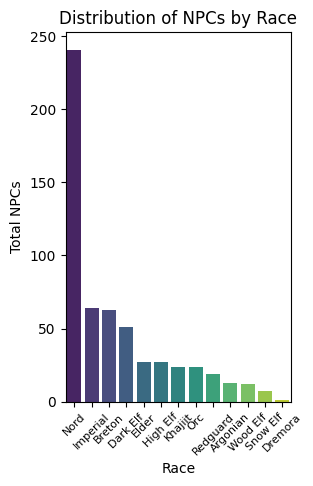

In [44]:
query = """
SELECT DISTINCT c.RACE
    ,COUNT(c.BASEID) OVER(PARTITION BY c.RACE) [Total NPCs]
    ,AVG(CAST(c.[LEVEL (PC=10)] as int)) OVER (PARTITION BY c.RACE) [Avg Level]
    ,AVG(CAST(c.[HEALTH (PC=10)] as int)) OVER (PARTITION BY c.RACE) [Avg Health]
    ,AVG(CAST(c.[MAGICKA (PC=10)] as int)) OVER (PARTITION BY c.RACE) [Avg Magicka]
    ,AVG(CAST(c.[STAMINA (PC=10)] as int)) OVER (PARTITION BY c.RACE) [Avg Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE <> 'Radiant'
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)
df.head(1000)

# first subplot will be for race distribution
plt.subplot(1,2,1)
sns.barplot(data=df, x='Race', y=df['Total NPCs'], palette='viridis', dodge=True)
plt.xticks(rotation=45, fontsize=8)
plt.title('Distribution of NPCs by Race')

plt.show()

C:\Users\nickp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


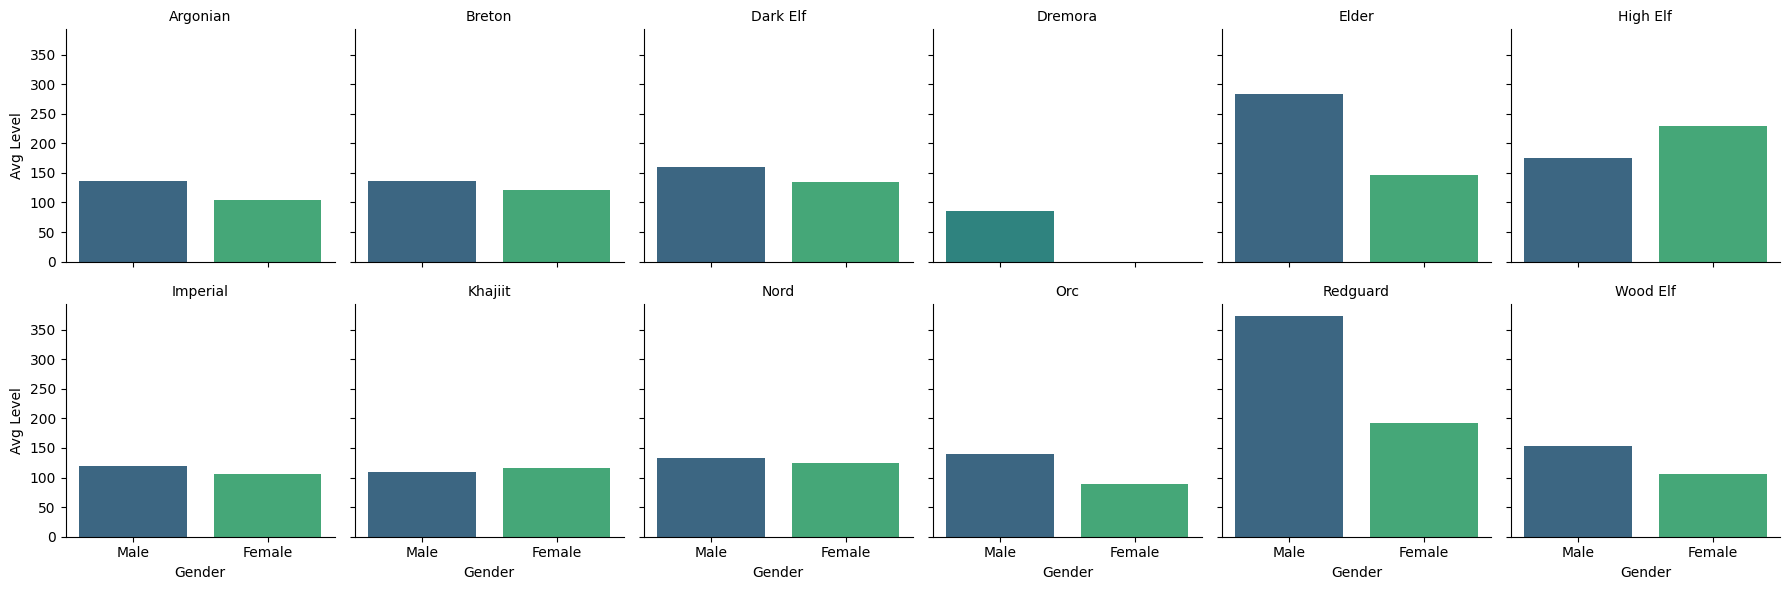

In [54]:
query = """
SELECT DISTINCT c.RACE
    ,c.GENDER
    ,COUNT(c.BASEID) OVER(PARTITION BY c.RACE) [Total NPCs]
    ,AVG(CAST(c.[LEVEL (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Level]
    ,AVG(CAST(c.[HEALTH (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Health]
    ,AVG(CAST(c.[MAGICKA (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Magicka]
    ,AVG(CAST(c.[STAMINA (PC=10)] as int)) OVER (PARTITION BY c.RACE,c.GENDER) [Avg Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE <> 'Radiant'
AND c.RACE <> 'Snow Elf'
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)

# first subplot will be for race distribution
#plt.subplot(1,2,1)
g = sns.FacetGrid(data=df, col='Race',col_wrap=6)
plt.title('Distribution of NPCs by Race')

g.map(sns.barplot,'Gender', 'Avg Health', palette='viridis')

g.set_axis_labels('Gender','Avg Level')
g.set_titles(col_template='{col_name}')

plt.show()

In [20]:
df.head(12)

,Race,Total NPCs,Avg Level,Avg Health,Avg Magicka,Avg Stamina
0,Nord,241,7.161826,131.033195,61.290456,80.564854
1,Imperial,64,6.796875,115.250000,68.656250,74.593750
2,Breton,63,8.777778,131.111111,89.333333,70.904762
3,Dark Elf,51,8.764706,152.764706,92.176471,83.574468
4,Elder,27,22.814815,247.666667,93.111111,167.481481
5,High Elf,27,12.592593,186.925926,163.074074,52.222222
6,Khajiit,24,7.416667,111.916667,55.458333,78.000000
7,Orc,24,8.083333,123.666667,64.000000,95.434783
8,Redguard,19,13.631579,287.894737,89.105263,105.263158
9,Argonian,13,6.846154,126.307692,71.384615,73.076923


Text(0.5, 1.0, 'Distribution of Level')

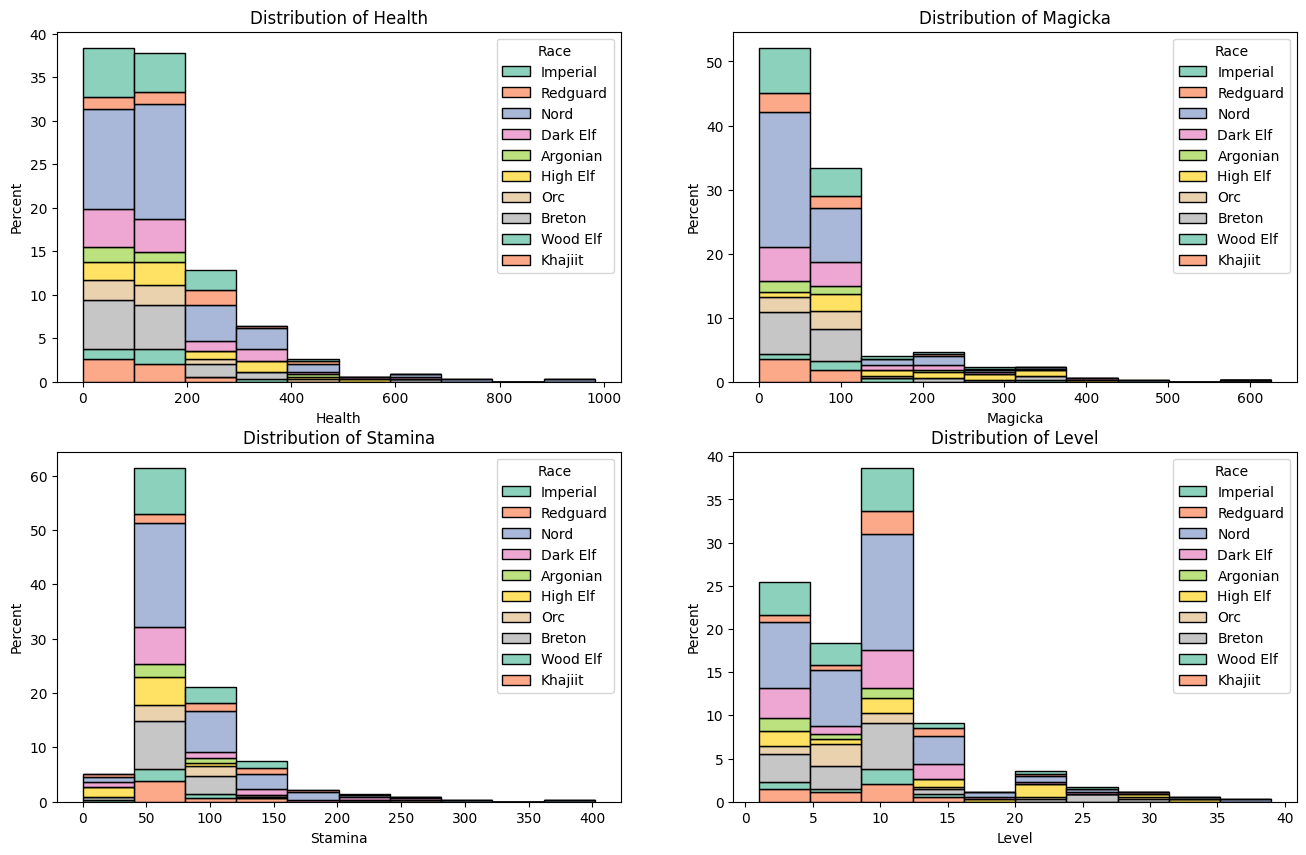

In [88]:
query = """
SELECT DISTINCT c.RACE
    ,CAST(c.[LEVEL (PC=10)] as int) [Level]
    ,CAST(c.[HEALTH (PC=10)] as int) [Health]
    ,CAST(c.[MAGICKA (PC=10)] as int)[Magicka]
    ,CAST(c.[STAMINA (PC=10)] as int) [Stamina]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE NOT IN ('Elder','Radiant','Snow Elf','Dremora')
AND c.CLASS NOT LIKE '%ebony%warrior%'
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='Health', bins=10, kde=False,color='red', hue='Race', stat='percent', palette="Set2", multiple="stack")
plt.title('Distribution of Health')

plt.subplot(2,2,2)
sns.histplot(data=df, x='Magicka', bins=10, kde=False,color='blue', hue='Race', stat='percent', palette="Set2", multiple="stack")
plt.title('Distribution of Magicka')

plt.subplot(2,2,3)
sns.histplot(data=df, x='Stamina', bins=10, kde=False,color='green', hue='Race', stat='percent', palette="Set2", multiple="stack")
plt.title('Distribution of Stamina')

plt.subplot(2,2,4)
sns.histplot(data=df, x='Level', bins=10, kde=False,color='skyblue', hue='Race', stat='percent', palette="Set2", multiple="stack")
plt.title('Distribution of Level')


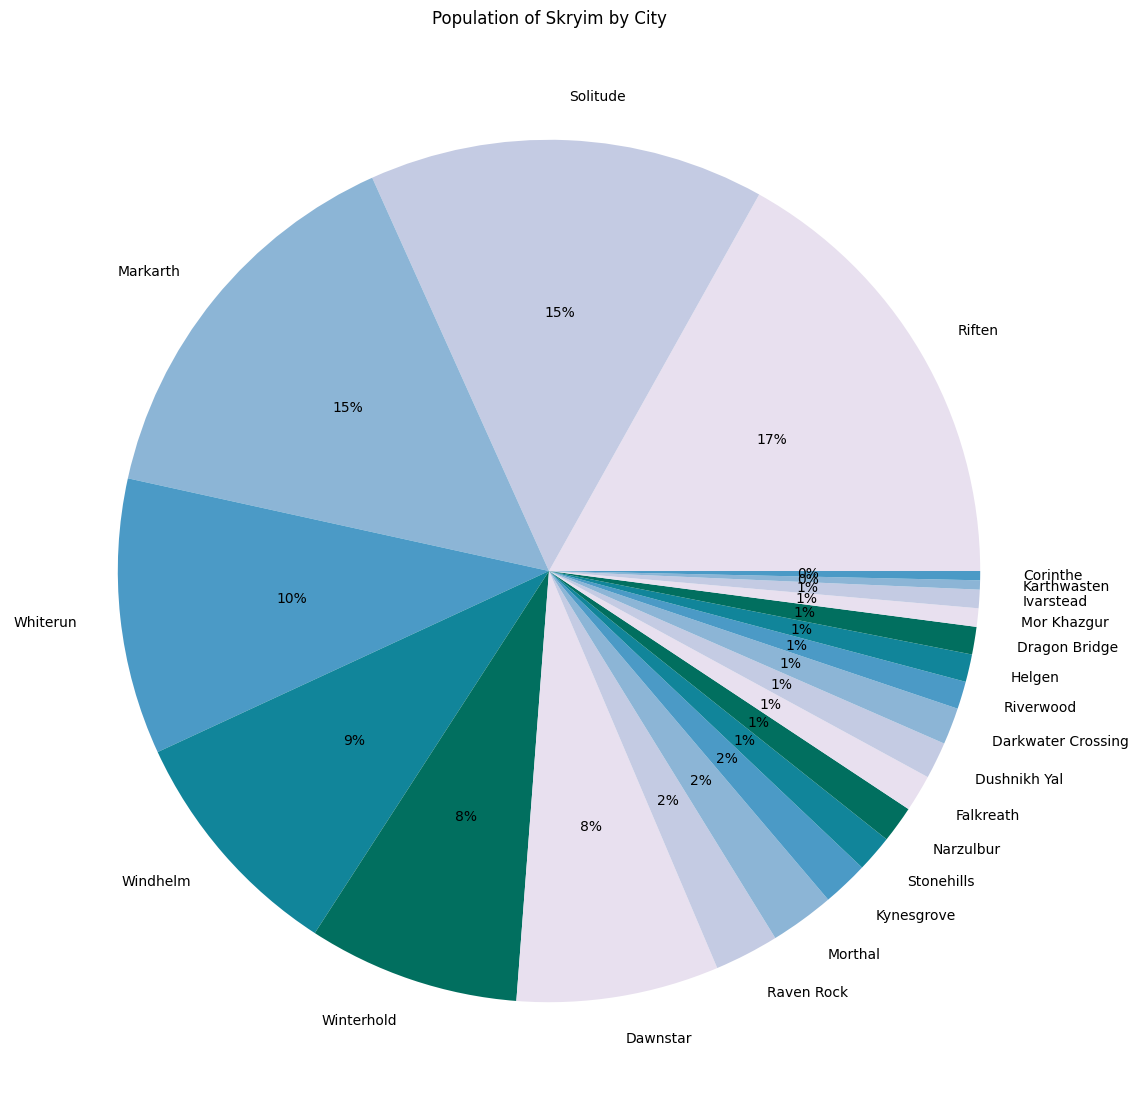

In [119]:
query = """
SELECT DISTINCT c.[Home City] [City]
    ,COUNT(c.BASEID) [Total]
FROM CHARACTERS c
WHERE c.BASEID <> 'None'
AND c.GENDER NOT IN ('Indeterminate','Radiant')
AND c.RACE <> 'Animals'
AND c.RESPAWNS = 'No'
AND c.[HEALTH (PC=10)] <> 'NaN'
AND c.NAME NOT LIKE '%ghost%'
AND c.CLASS <> 'Katria'
AND c.LOCATION <> 'Hall of Valor, Sovngarde'
AND c.RACE NOT IN ('Elder','Radiant','Snow Elf','Dremora')
AND c.CLASS NOT LIKE '%ebony%warrior%'
AND c.[Home City] <> 'None'
GROUP BY c.[Home City]
ORDER BY 2 DESC
"""

df = pd.read_sql(query, conn)

plt.figure(figsize=(20,14))
palette_color = sns.color_palette('PuBuGn') 
plt.pie(data=df, x='Total', labels='City', colors=palette_color,autopct='%.0f%%')
plt.title('Population of Skryim by City')
plt.xticks(rotation=45,fontsize=8)

plt.show()